### Calculate distance from offshore wind area to shore

In [12]:
import pandas as pd 
import geopandas as gpd
import numpy as np

Get coords of all offshore areas and change coord system to calculate distance in meters

In [13]:
from shapely import wkt
df_OW_nodes = pd.read_csv("Output/OW_nodes.csv")
df_OW_nodes["geometry"] = df_OW_nodes["geometry"].apply(wkt.loads)
OW_nodes = gpd.GeoDataFrame(df_OW_nodes, crs="EPSG:4326")
OW_nodes = OW_nodes.to_crs("EPSG:25833")
OW_nodes

,Node,Longitude,Latitude,geometry
0,Moray Firth,-2.990229,58.170702,POINT (-550382.221 6589636.681)
1,Firth of Forth,-2.047535,56.363729,POINT (-547016.494 6377809.984)
2,Dogger Bank,2.333333,54.833333,POINT (-311348.707 6150061.633)
3,Hornsea,1.845196,53.820112,POINT (-363643.253 6044135.822)
4,Outer Dowsing,0.905074,53.311186,POINT (-436309.630 6000047.419)
5,Norfolk,2.168638,52.782831,POINT (-363440.248 5925669.401)
6,East Anglia,1.883496,51.890054,POINT (-400723.386 5830562.425)
7,Borssele,3.197221,51.957807,POINT (-309616.206 5822431.844)
8,Hollandsee Kust,4.008061,52.462704,POINT (-245595.575 5869521.124)
9,Helgoländer Bucht,7.167722,54.322931,POINT (-8909.976 6047781.867)


Use map of Europe to get closest distance to shore (source: DTU - https://data.dtu.dk/articles/dataset/Shapefile_of_European_countries/23686383)

In [14]:
europe: gpd.GeoDataFrame = gpd.read_file("Data/Europe_merged.dbf")
europe = europe.to_crs("EPSG:25833")
europe

,GID_0,COUNTRY,geometry
0,ALB,Albania,"MULTIPOLYGON (((933452.490 4405768.018, 932122..."
1,BEL,Belgium,"MULTIPOLYGON (((-189819.748 5526748.773, -1898..."
2,BGR,Bulgaria,"MULTIPOLYGON (((1348228.573 4624334.001, 13481..."
3,HRV,Croatia,"MULTIPOLYGON (((647404.767 4734368.685, 647418..."
4,CYP,Cyprus,"MULTIPOLYGON (((2213925.332 4040622.955, 22145..."
5,CZE,Czechia,"POLYGON ((479063.837 5388580.493, 479072.326 5..."
6,DNK,Denmark,"MULTIPOLYGON (((274884.233 6058451.110, 274869..."
7,EST,Estonia,"MULTIPOLYGON (((1222412.793 6444985.981, 12223..."
8,FIN,Finland,"MULTIPOLYGON (((898749.184 6647164.078, 898745..."
9,FRA,France,"MULTIPOLYGON (((-251667.385 4811166.523, -2516..."


<Axes: >

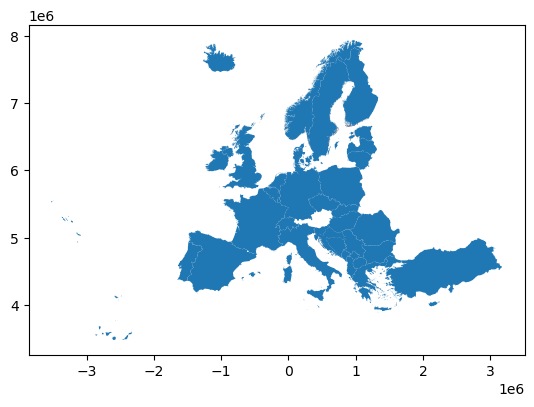

In [5]:
europe.plot()

Define possible onshore connections for wind farms

In [33]:
POSSIBLE_ONSHORE_CONNS = dict({
    'Moray Firth': ['United Kingdom'],
    'Firth of Forth': ['United Kingdom'],
    'Dogger Bank': ['United Kingdom'],
    'Hornsea': ['United Kingdom'],
    'Outer Dowsing': ['United Kingdom'],
    'Norfolk': ['United Kingdom'],
    'East Anglia': ['United Kingdom'],
    'Borssele': ['Belgium', 'Netherlands'],
    'Hollandsee Kust': ['Netherlands'],
    'Helgoländer Bucht': ['Netherlands', 'Germany'],  
    'Nordsøen': ['Denmark'],
    'Energyhub EU': ['Norway', 'United Kingdom', 'Denmark', 'Netherlands', 'Belgium'],
    'Nordvest A': ['Norway'],
    'Nordvest C': ['Norway'],
    'Vestavind A': ['Norway'],
    'Sønnavind A': ['Norway'],
    'Sørvest C': ['Norway'],
    'Nordvest B': ['Norway'],
    'Vestavind F': ['Norway'],
    'Sørvest E': ['Norway'],
    'Sørvest A': ['Norway'],
    'Vestavind B': ['Norway'],
    'Vestavind C': ['Norway'],
    'Vestavind D': ['Norway'],
    'Sørvest F': ['Norway'],
    'Sørvest B': ['Norway'],
    'Nordavind B': ['Norway'],
    'Nordavind A': ['Norway'],
    'Nordavind D': ['Norway'],
    'Nordavind C': ['Norway'],
    'Vestavind E': ['Norway'],
    'Sørvest D': ['Norway'],
})

No built-in functionality to get closest point on polygon, so define custom function (could be optimized)

In [8]:
from shapely import MultiPolygon, Point

def get_closest_point_on_polygon(offshore_coords, onshore_polygon, min_dist_to_shore): 
    dist_threshold = 1000 # 1km for faster runtime
    if isinstance(onshore_polygon, MultiPolygon):
        for geom_seq in onshore_polygon.geoms:
            for coords in geom_seq.exterior.coords:
                dist = Point(coords).distance(offshore_coords)
                if dist > min_dist_to_shore - dist_threshold and dist < min_dist_to_shore + dist_threshold:
                    return Point(coords)
    else:
        print(onshore_polygon)
        for coords in onshore_polygon.boundary.coords:
            dist = Point(coords).distance(offshore_coords)
            if dist > min_dist_to_shore - dist_threshold and dist < min_dist_to_shore + dist_threshold:
                    return Point(coords)
            
def get_onshore_node_and_dist(offshore_coords):
    min_dist_to_shore = np.inf
    min_dist_onshore_polygon = None
    min_dist_onshore_country = None
    for _, country_row in europe.iterrows():
        onshore_polygon = country_row["geometry"]
        dist = onshore_polygon.distance(offshore_coords)
        if dist < min_dist_to_shore:
            min_dist_to_shore = dist
            min_dist_onshore_polygon = onshore_polygon
            min_dist_onshore_country = country_row["COUNTRY"]    
    closest_point_onshore = get_closest_point_on_polygon(offshore_coords, min_dist_onshore_polygon, min_dist_to_shore)
    min_dist_to_shore = min_dist_to_shore / 1000  #from m to km
    print(min_dist_to_shore, closest_point_onshore, min_dist_onshore_country)
    return dict({"dist_to_shore": min_dist_to_shore, "to_shore_coords": closest_point_onshore, "onshore_country": min_dist_onshore_country})

In [9]:
OW_nodes = OW_nodes[["dist_to_shore", "to_shore_coords", "onshore_country"]] = \
    OW_nodes.apply(lambda row: get_onshore_node_and_dist(row["geometry"]), axis="columns", result_type="expand")
OW_nodes

20.413166347101768 POINT (-556740.6763346731 6610078.994253142) United Kingdom
34.93784942436102 POINT (-582943.0090381815 6378436.337497873) United Kingdom
177.01888819142297 POINT (-483333.9579786422 6104115.299445267) United Kingdom
106.07635260941159 POINT (-424343.4094513691 5955927.603492869) United Kingdom
37.205824744638036 POINT (-452410.77894964826 5965405.332027368) United Kingdom
32.697158993831415 POINT (-397115.047169451 5926880.673076529) United Kingdom
30.46204699588585 POINT (-416614.0062020732 5857652.832668043) United Kingdom
43.26993374335903 POINT (-281117.9381982789 5789100.575892819) Netherlands
35.78644743633564 POINT (-217202.91539304447 5846148.777492136) Netherlands
47.48735062310829 POINT (34856.04368729505 6028400.642461915) Germany
67.47744529655277 POINT (73667.15308002662 6248194.868931675) Denmark
162.3537698534707 POINT (64892.52944696264 6177949.306694956) Denmark
98.22470471926385 POINT (349692.1839294498 7325276.664957862) Norway
67.84751626139963 P

,dist_to_shore,to_shore_coords,onshore_country
0,20.413166,POINT (-556740.6763346731 6610078.994253142),United Kingdom
1,34.937849,POINT (-582943.0090381815 6378436.337497873),United Kingdom
2,177.018888,POINT (-483333.9579786422 6104115.299445267),United Kingdom
3,106.076353,POINT (-424343.4094513691 5955927.603492869),United Kingdom
4,37.205825,POINT (-452410.77894964826 5965405.332027368),United Kingdom
5,32.697159,POINT (-397115.047169451 5926880.673076529),United Kingdom
6,30.462047,POINT (-416614.0062020732 5857652.832668043),United Kingdom
7,43.269934,POINT (-281117.9381982789 5789100.575892819),Netherlands
8,35.786447,POINT (-217202.91539304447 5846148.777492136),Netherlands
9,47.487351,POINT (34856.04368729505 6028400.642461915),Germany


Need coords of closest onshore points, so convert back to lat/lon-coords system